# Demo Workshop : Generate Contour Plots on Named Selections

***
### Aim of this workshop :
### To use PyDPF to generate a contour plot on a specific Named Selection using the DpfPlotter (based on PyVista library)
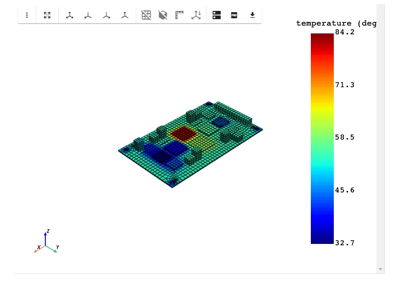
***

 -  The provided analysis is a Transient Thermal Mechanical model.
 -  This workshop does not require any specific knowledge in Mechanical discipline
 -  The workshop shows the following steps:

            ‐ Create a DPF model
            ‐ Select a Named Selection
            ‐ Scope Named Selection to corresponding Mesh
            ‐ Results Property – Temperature & Time Scoping
            ‐ Generate Contour Plot
            ‐ Calculate Min & Max Temperature in the DPF Field

 -  Learning Points:

            ‐ Use a Mechanical Result File and Create a DPF Model
            - Scoping a Named Selection to Corresponding Mesh
            - Use from_scoping Operator
            - Fetch a (Temperature FIELD) Result and Plot as a contour using DPFPlotter

### Import Modules

In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core.plotter import DpfPlotter

#choose a version of server
# dpf.start_local_server(r"C:\Program Files\ANSYS Inc\v241")


### Load result file and create model database

#####  - Define Datasource using result file
#####  - Define Model using this datasource


In [2]:

path = r"inputs\transient_thermal.rth"

ds = dpf.DataSources(path)
my_model = dpf.Model(ds)

### List Contents of Model

In [3]:
print(my_model)

DPF Model
------------------------------
Static analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Thermal
Available results:
     -  temperature: Nodal Temperature
     -  elemental_summable_miscellaneous_data: Elemental Elemental Summable Miscellaneous Data
     -  element_nodal_forces: ElementalNodal Element nodal Forces
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  element_euler_angles: ElementalNodal Element Euler Angles
     -  elemental_non_summable_miscellaneous_data: Elemental Elemental Non Summable Miscellaneous Data
     -  structural_temperature: ElementalNodal Structural temperature
     -  contact_status: Eleme

In [4]:
my_mesh = my_model.metadata.meshed_region

print(my_mesh)

DPF  Meshed Region: 
  66510 nodes 
  23874 elements 
  Unit: m 
  With solid (3D) elements, shell (2D) elements, shell (3D) elements


### Select preferable Named Selection
##### -  Print all named selections

In [5]:

get_NSs = my_model.metadata.available_named_selections
print(get_NSs)

['CONVECTIONWITHPILOTNODE4', 'ELEMENTAL_PCB', 'NODAL_PCB', 'PCB', 'PCB_CONTACTS', 'PCB_CONTS_ELEM', 'PCB_CONTS_NODE', 'PCB_CONT_19', 'PCB_CONT_2', 'PCB_TARG_19', 'PCB_TARG_2', '_ALLCONTACTS']


##### -  Choose a  named selection from the above list

In [6]:
my_mesh_scoping = my_model.metadata.named_selection("NODAL_PCB")
print(my_mesh_scoping)


DPF  Scoping: 
  with Nodal location and 20704 entities



### Scope Named Selection to corresponding Mesh

##### 1. Define "from scoping" operator
##### 2. Connect it to two inputs : MESHED REGION( al Nodes and Elements)  and SCOPING (with Nodal location and 20704 entities from Named Selection)
##### 3. Get Output : A new MESHED REGION corresponding to named selection



***
### About Operators

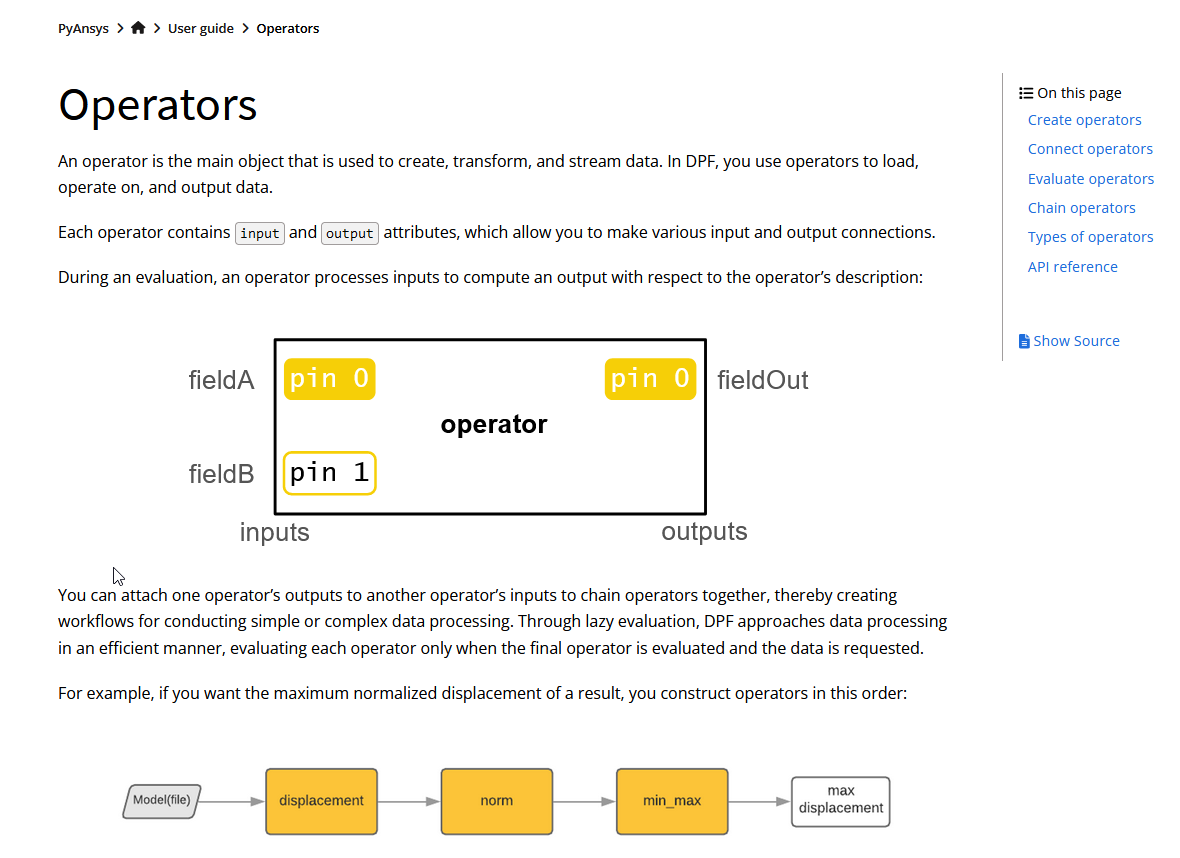

[https://dpf.docs.pyansys.com/version/stable/user_guide/operators.html]

***

In [7]:

scoping_op = dpf.operators.mesh.from_scoping()
scoping_op.inputs.scoping.connect(my_mesh_scoping)
scoping_op.inputs.mesh.connect(my_mesh)

my_mesh_ns = scoping_op.outputs.mesh()

print(my_mesh_ns)

DPF  Meshed Region: 
  20704 nodes 
  5544 elements 
  Unit: m 
  With solid (3D) elements, shell (2D) elements, shell (3D) elements


### Get Temperature results at last time step
##### 1. Get temperatures at all timepoints(for entire model)
##### 2. Filter results for  SCOPING(Meshed Region) we create above
##### 3. Filter last time point data. You now have the FIELD


In [8]:

get_all_temps = my_model.results.temperature.on_all_time_freqs
get_fieldContainers_temperature = get_all_temps(mesh_scoping=my_mesh_scoping).eval()

get_field_temperature = get_fieldContainers_temperature[-1]

print(get_field_temperature)

DPF temperature_3.s Field
  Location: Nodal
  Unit: degC
  20704 entities 
  Data: 1 components and 20704 elementary data 

  IDs                   data(degC)
  ------------          ----------
  45805                 3.798804e+01   
                        
  45806                 3.797735e+01   
                        
  45807                 3.797568e+01   
                        
  ...




### Contour Plot: Temperature on PCB

##### Create a DpfPlotter object (which is a PyVista based object).

##### Pass on FIELD and SCOPING to it (to show as figure)

In [9]:

my_plot = DpfPlotter()
my_plot.add_field(get_field_temperature, my_mesh_ns)
my_plot.show_figure(show_axes=True)

Widget(value='<iframe src="http://localhost:52196/index.html?ui=P_0x2112947e1d0_0&reconnect=auto" class="pyvis…

### Print Min & Max Temperature in the selected field

In [10]:

print("Minimum Temperature: ", round(float(get_field_temperature.data.min()),3), " degC")
print("Maximum Temperature: ", round(float(get_field_temperature.data.max()),3), " degC")


Minimum Temperature:  32.711  degC
Maximum Temperature:  84.199  degC


### Recap

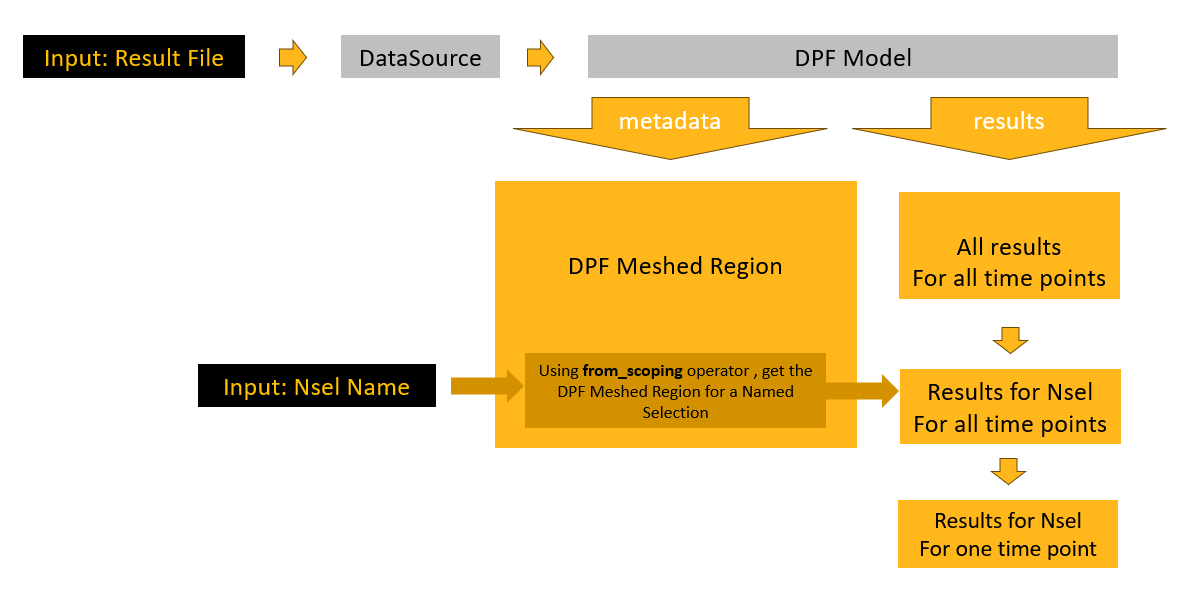